In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
from openpyxl import Workbook

In [2]:
#!pip install chardet

In [3]:
#!pip install openpyxl

In [4]:
data = pd.read_excel('universidades_grupo_3.xlsx')
data.head(5)

,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,CONDICIÓN JURÍDICA,Dummy_uni,dummy_lic,latitud,longitud
0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018,NaN,NaN,0,1,-12.056158,-77.084520
1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018,NaN,NaN,0,1,-13.161248,-74.225772
2,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019,NaN,NaN,0,1,-13.521930,-71.958321
3,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018,NaN,NaN,0,1,-8.115007,-79.038305
4,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018,NaN,NaN,0,1,-16.409047,-71.537451


In [5]:
# objects from Geopandas 

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

In [7]:
unis_mapa = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy( data.longitud, data.latitud) )
unis_mapa.head( 5 )

,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,CONDICIÓN JURÍDICA,Dummy_uni,dummy_lic,latitud,longitud,geometry
0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018,NaN,NaN,0,1,-12.056158,-77.084520,POINT (-77.08452 -12.05616)
1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018,NaN,NaN,0,1,-13.161248,-74.225772,POINT (-74.22577 -13.16125)
2,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019,NaN,NaN,0,1,-13.521930,-71.958321,POINT (-71.95832 -13.52193)
3,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018,NaN,NaN,0,1,-8.115007,-79.038305,POINT (-79.03830 -8.11501)
4,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018,NaN,NaN,0,1,-16.409047,-71.537451,POINT (-71.53745 -16.40905)


In [8]:
unis_mapa_pub = unis_mapa[unis_mapa.Dummy_uni == 0]
unis_mapa_pub

,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,CONDICIÓN JURÍDICA,Dummy_uni,dummy_lic,latitud,longitud,geometry
0,Universidad Nacional Mayor de San Marcos,Lima,Lima,Real Cédula de Fundación,12/05/1551,Res. N° 036-2018-SUNEDU/CD,04/04/2018,NaN,NaN,0,1,-12.056158,-77.084520,POINT (-77.08452 -12.05616)
1,Universidad Nacional de San Cristóbal de Huamanga,Ayacucho,Huamanga,Ley N° 12828,03/07/1677,Res. N° 050-2018-SUNEDU/CD,01/06/2018,NaN,NaN,0,1,-13.161248,-74.225772,POINT (-74.22577 -13.16125)
2,Universidad Nacional de San Antonio Abad del C...,Cusco,Cusco,Real Cédula de Fundación,01/06/1692,Res. N° 059-2019-SUNEDU/CD,04/05/2019,NaN,NaN,0,1,-13.521930,-71.958321,POINT (-71.95832 -13.52193)
3,Universidad Nacional de Trujillo,La Libertad,Trujillo,Decreto Directoral,10/05/1824,Res. N° 127-2018-SUNEDU/CD,20/09/2018,NaN,NaN,0,1,-8.115007,-79.038305,POINT (-79.03830 -8.11501)
4,Universidad Nacional de San Agustín de Arequipa,Arequipa,Arequipa,Acta de Instalación,11/11/1828,Res. N° 098-2018-SUNEDU/CD,27/08/2018,NaN,NaN,0,1,-16.409047,-71.537451,POINT (-71.53745 -16.40905)
5,Universidad Nacional de Ingeniería,Lima,Lima,Ley N° 12379,19/07/1955,Res. N° 073-2017-SUNEDU/CD,28/11/2017,NaN,NaN,0,1,-12.023802,-77.048406,POINT (-77.04841 -12.02380)
6,Universidad Nacional Agraria La Molina,Lima,Lima,Ley N° 13417,08/04/1960,Res. N° 011-2017-SUNEDU/CD,20/03/2017,NaN,NaN,0,1,-12.081749,-76.943190,POINT (-76.94319 -12.08175)
7,Universidad Nacional San Luis Gonzaga,Ica,Ica,Ley N° 12495,20/12/1955,NaN,NaN,NaN,NaN,0,0,-14.087132,-75.733515,POINT (-75.73351 -14.08713)
8,Universidad Nacional del Centro del Perú,Junín,Huancayo,Ley N° 13827,02/01/1962,Res. N° 022-2019-SUNEDU/CD,01/03/2019,NaN,NaN,0,1,-12.033046,-75.237332,POINT (-75.23733 -12.03305)
9,Universidad Nacional de la Amazonía Peruana,Loreto,Maynas,Ley N° 13498,14/01/1961,Res. N° 012-2019-SUNEDU/CD,01/02/2019,NaN,NaN,0,1,-3.745989,-73.245699,POINT (-73.24570 -3.74599)


In [9]:
unis_mapa_pub_lic = unis_mapa_pub[unis_mapa_pub.dummy_lic == 1]
unis_mapa_pub_nolic = unis_mapa_pub[unis_mapa_pub.dummy_lic == 0]

In [10]:
unis_mapa_priv = unis_mapa[unis_mapa.Dummy_uni == 1]
unis_mapa_priv

,UNIVERSIDAD,DEPARTAMENTO,PROVINCIA,DISPOSITIVO LEGAL DE CREACIÓN,FECHA DE CREACIÓN,DISPOSITIVO LEGAL DE LICENCIAMIENTO,FECHA DE PUB. DIARIO EL PERUANO,DISPOSITIVO LEGAL DE LICENCIAMIENTO O DENEGATORIA,CONDICIÓN JURÍDICA,Dummy_uni,dummy_lic,latitud,longitud,geometry
51,Pontificia Universidad Católica del Perú,Lima,Lima,Decreto Supremo,24/03/1917,NaN,06/07/2016,Res. N° 025-2016-SUNEDU/CD,Asociativa,1,1,-12.069512,-77.079359,POINT (-77.07936 -12.06951)
52,Universidad Peruana Cayetano Heredia,Lima,Lima,Decreto Supremo N° 18,22/09/1961,NaN,27/07/2016,Res. N° 029-2016-SUNEDU/CD,Asociativa,1,1,-12.023977,-77.056505,POINT (-77.05650 -12.02398)
53,Universidad Católica de Santa María,Arequipa,Arequipa,Decreto Supremo N° 24,06/12/1961,NaN,31/12/2017,Res. N° 102-2017-SUNEDU/CD,Asociativa,1,1,-16.406179,-71.547630,POINT (-71.54763 -16.40618)
54,Universidad del Pacífico,Lima,Lima,Decreto Supremo N° 08,28/02/1962,NaN,27/07/2016,Res. N° 030-2016-SUNEDU/CD,Asociativa,1,1,-12.083797,-77.048806,POINT (-77.04881 -12.08380)
55,Universidad de Lima,Lima,Lima,Decreto Supremo N° 23,25/04/1962,NaN,12/07/2016,Res. N° 027-2016-SUNEDU/CD,Asociativa,1,1,-12.084724,-76.971009,POINT (-76.97101 -12.08472)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Universidad Santo Tomás de Aquino de Ciencia e...,Junín,Huancayo,Res. N° 407-2012-CONAFU,25/07/2012,NaN,NaN,NaN,Societaria,1,0,-12.084047,-75.208488,POINT (-75.20849 -12.08405)
139,Universidad Privada SISE,Lima,Lima,Res. N° 408-2012-CONAFU,25/07/2012,NaN,NaN,NaN,Societaria,1,0,NaN,NaN,POINT EMPTY
140,Universidad Seminario Evangélico de Lima (*12),Lima,Lima,Ley N° 30220,09/07/2014,NaN,NaN,NaN,Asociativa,1,0,-12.063959,-76.960074,POINT (-76.96007 -12.06396)
141,Universidad Seminario Bíblico Andino (*12),Lima,Lima,Ley N° 30220,09/07/2014,NaN,NaN,NaN,Asociativa,1,0,-12.069621,-77.053398,POINT (-77.05340 -12.06962)


In [11]:
unis_mapa_priv_lic = unis_mapa_priv[unis_mapa_priv.dummy_lic == 1]
unis_mapa_priv_nolic = unis_mapa_priv[unis_mapa_priv.dummy_lic == 0]

In [13]:
# Upload shape file at district level

#maps = gpd.read_file(r'C:\Users\maria/OneDrive/Documentos/GitHub/R-y-Python/geopandas_data/shape_file/DISTRITOS.shp')
#Relative path
maps = gpd.read_file(r"../../data/Trabajo_final/5_Informacion_Cartografica-Shape/DISTRITOS.shp")
maps["geometry"]

0       POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1       POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2       POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3       POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4       POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
                              ...                        
1868    POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869    POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870    POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871    POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872    POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...
Name: geometry, Length: 1873, dtype: geometry

In [14]:
maps.geometry[0].boundary.coords.xy

(array('d', [-75.31797010604475, -75.31710488392423, -75.31604648791898, -75.31537303628215, -75.31469932241646, -75.31392881111611, -75.3133303495971, -75.31169723519622, -75.30615235974136, -75.30464848475174, -75.30204673484673, -75.30106448524998, -75.29776760924966, -75.29447260989667, -75.28983985902022, -75.28862698442924, -75.2863086102684, -75.2851563586247, -75.28393560955703, -75.28272260912615, -75.28220311024171, -75.28202736045313, -75.28138673398348, -75.28156248370055, -75.28098236019497, -75.28017386006405, -75.27959373487306, -75.27774798404425, -75.27780860999633, -75.27711523520276, -75.27648235912312, -75.27555073511627, -75.27393360884412, -75.27306448398218, -75.27278123480181, -75.27197261018847, -75.27063673497003, -75.26936310921559, -75.26861523478374, -75.26768548488297, -75.26531248414989, -75.26329098403181, -75.26230660998112, -75.26178710908653, -75.26045898389629, -75.2592461099199, -75.25808785916968, -75.25611910895401, -75.25409760880586, -75.2502148

In [15]:
maps = maps[['IDDPTO', 'geometry']]
maps = maps.rename({'IDDPTO':'UBIGEO'}, axis =1 )
maps 

,UBIGEO,geometry
0,10,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,10,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [16]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,10,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,10,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [17]:
dpt_shp = maps.dissolve( by = 'UBIGEO' )

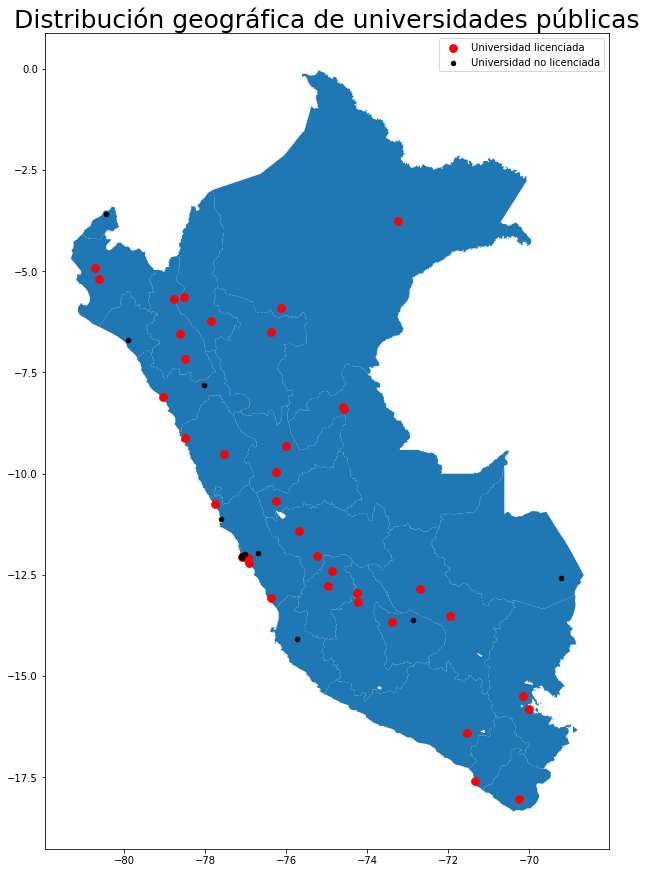

In [18]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

unis_mapa_pub_lic.plot(ax = ax, color = 'red', label = "Universidad licenciada", markersize=60)
unis_mapa_pub_nolic.plot(ax = ax, color = 'black', label = "Universidad no licenciada", markersize=20)

plt.legend(loc='upper right')
plt.title(label="Distribución geográfica de universidades públicas", fontsize=25)
plt.savefig('Universidades públicas', bbox_inches='tight')

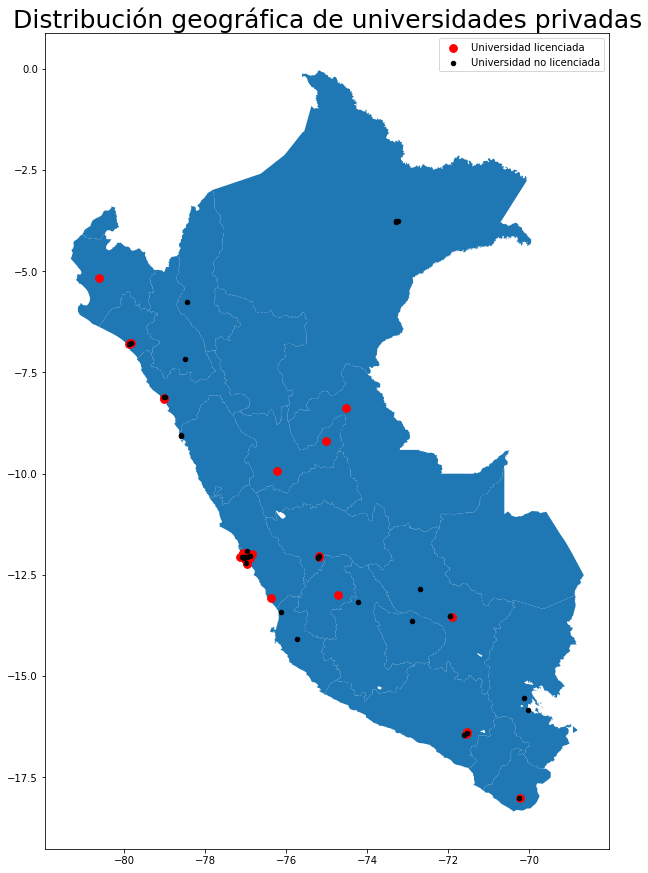

In [19]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

unis_mapa_priv_lic.plot(ax = ax, color = 'red', label = "Universidad licenciada", markersize=60)
unis_mapa_priv_nolic.plot(ax = ax, color = 'black', label = "Universidad no licenciada", markersize=20)

plt.legend(loc='upper right')
plt.title(label="Distribución geográfica de universidades privadas", fontsize=25)
plt.savefig('Universidades privadas', bbox_inches='tight')